In [7]:
first =[45.78, 44.66, 47.42, 43.27, 46.7]
second = [53.16, 53.0, 58.49, 55.0, 55.57]
third = [57.8, 58.02, 63.36, 62.74]
fourth = [65.31, 65.19, 67.5, 71.32]
fifth = [72.03, 73.1, 74.5, 72.97]


In [8]:
first_mean = sum(first) / 5
second_mean = sum(second) / 5
third_mean = sum(third) / 4
fourth_mean = sum(fourth) / 4
fifth_mean = sum(fifth) / 4

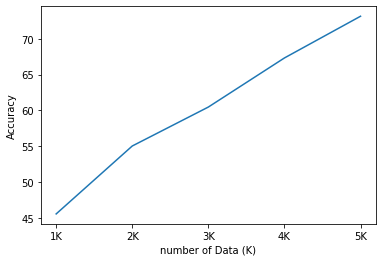

In [13]:
import matplotlib.pyplot as plt

plt.plot(["1K","2K","3K","4K","5K"], [first_mean,second_mean,third_mean, fourth_mean, fifth_mean])
plt.xlabel('number of Data (K)')
plt.ylabel('Accuracy')
plt.show()